In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Business Understanding 1

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?

# Data Understanding 1

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

In [3]:
hotel = pd.read_csv("data/hotel_bookings.csv",low_memory=False)

In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


One hot encode "hotel", 'arrival_date_month', 'customer_type', 'reservation_status', 'deposit_type' but first make sure you check for dups

drop company column and reservation_status_date

remove NA rows for agent

In [6]:
# dropping company column as there isn't enough data 
del hotel['company']
del hotel['country']

#### Checking for duplicates

In [7]:
hotel_dup = hotel["hotel"].value_counts().reset_index()
hotel_dup

,index,hotel
0,City Hotel,79330
1,Resort Hotel,40060


In [8]:
arrival_date_dup = hotel["arrival_date_month"].value_counts().reset_index()
arrival_date_dup

,index,arrival_date_month
0,August,13877
1,July,12661
2,May,11791
3,October,11160
4,April,11089
5,June,10939
6,September,10508
7,March,9794
8,February,8068
9,November,6794


In [9]:
cust_type_dup = hotel["customer_type"].value_counts().reset_index()
cust_type_dup

,index,customer_type
0,Transient,89613
1,Transient-Party,25124
2,Contract,4076
3,Group,577


In [10]:
reservation_dup = hotel["reservation_status"].value_counts().reset_index()
reservation_dup

,index,reservation_status
0,Check-Out,75166
1,Canceled,43017
2,No-Show,1207


In [11]:
deposit_dup = hotel["deposit_type"].value_counts().reset_index()
deposit_dup

,index,deposit_type
0,No Deposit,104641
1,Non Refund,14587
2,Refundable,162


In [12]:
meal_dup = hotel["meal"].value_counts().reset_index()
meal_dup

,index,meal
0,BB,92310
1,HB,14463
2,SC,10650
3,Undefined,1169
4,FB,798


In [13]:
market_dup = hotel["market_segment"].value_counts().reset_index()
market_dup

,index,market_segment
0,Online TA,56477
1,Offline TA/TO,24219
2,Groups,19811
3,Direct,12606
4,Corporate,5295
5,Complementary,743
6,Aviation,237
7,Undefined,2


#### Dropping NA values from agent 

the loss of data is not significant

In [14]:
hotel.dropna(subset=['agent'])
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Understanding 2

# Visualizations

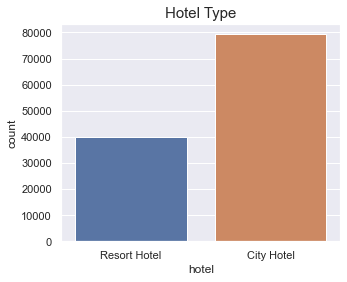

In [15]:
# Count for both hotel types
sns.set(style = "darkgrid")
plt.figure(figsize=(5,4))
plt.title('Hotel Type', fontdict = {'fontsize': 15})
sns.countplot(data=hotel, x = 'hotel')
plt.show()

<AxesSubplot:xlabel='hotel', ylabel='count'>

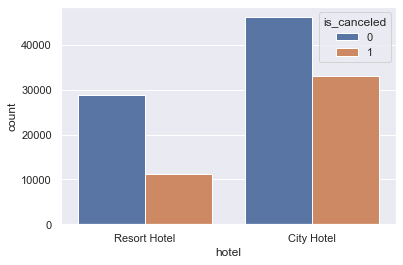

In [16]:
sns.countplot(data=hotel, x = 'hotel', hue='is_canceled')

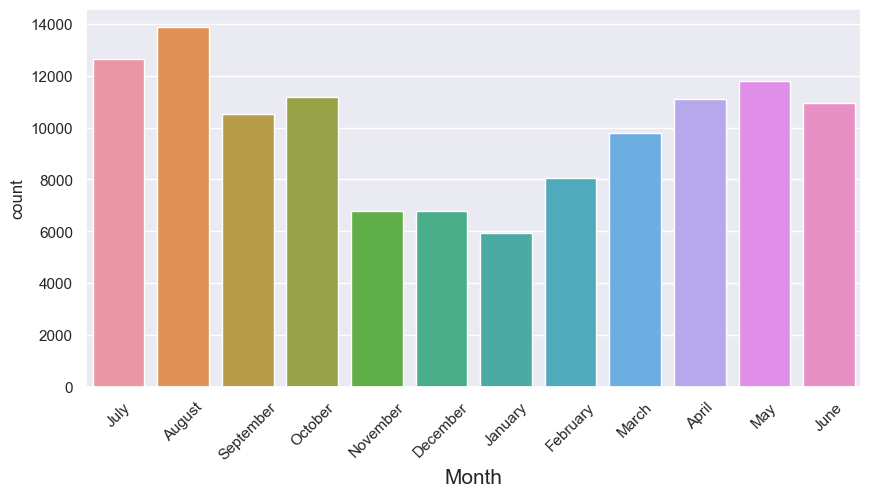

In [17]:
#Count of Hotel Bookings by Month
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=hotel, x = 'arrival_date_month')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

From the graph above we can see that August was the busiest month

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

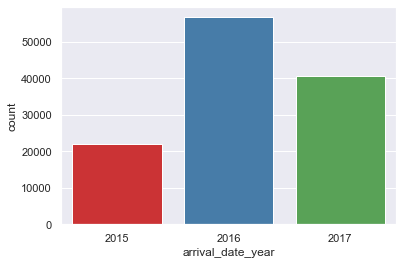

In [18]:
#Count of hotel Booking by year
sns.countplot(data=hotel, x=hotel['arrival_date_year'], palette='Set1')

From the graph above, 2016 was the busiest year

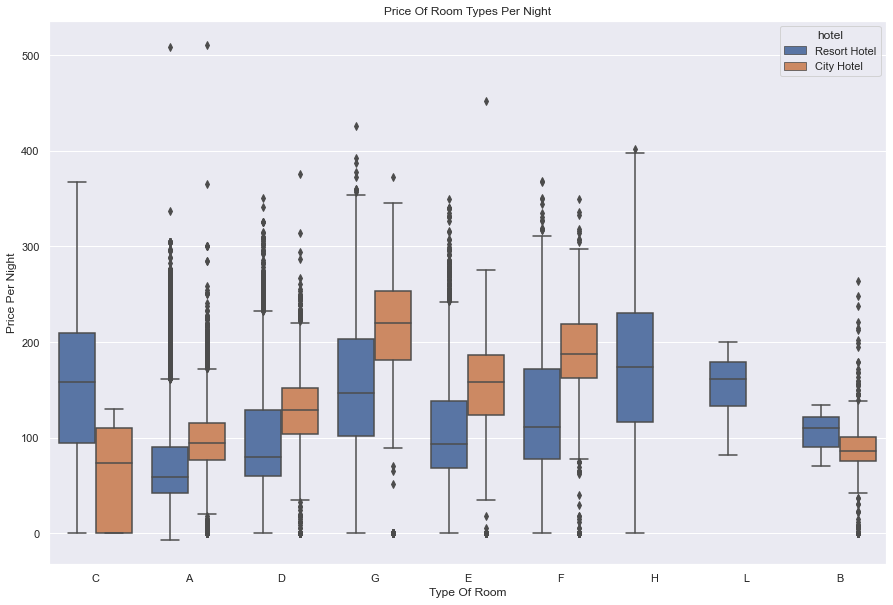

In [19]:
#Distribution of price of each room type
plt.figure(figsize=(15,10))
sns.boxplot(data=hotel[hotel['is_canceled'] == 0],x='reserved_room_type',y='adr',hue='hotel')
plt.title('Price Of Room Types Per Night')
plt.xlabel('Type Of Room')
plt.ylabel('Price Per Night')
plt.show()

<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

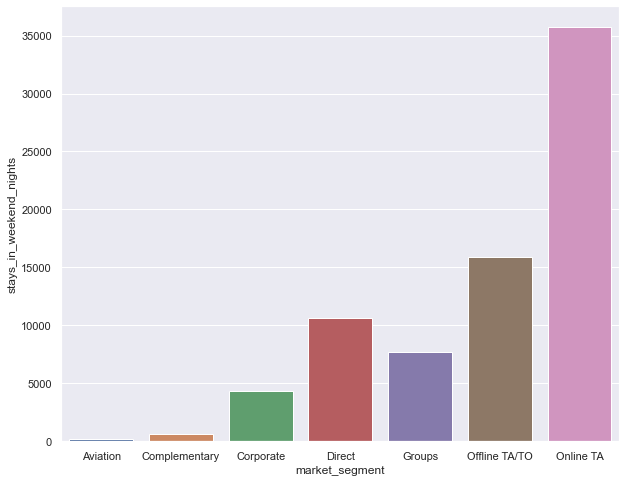

In [20]:
#Analysing preference of guests
plt.figure(figsize=(10,8))
sns.barplot(x=hotel[hotel['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count().index,
            y=hotel[hotel['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count())

From the chart above we can see that the online travel agents are the best market for reservation by people

<AxesSubplot:>

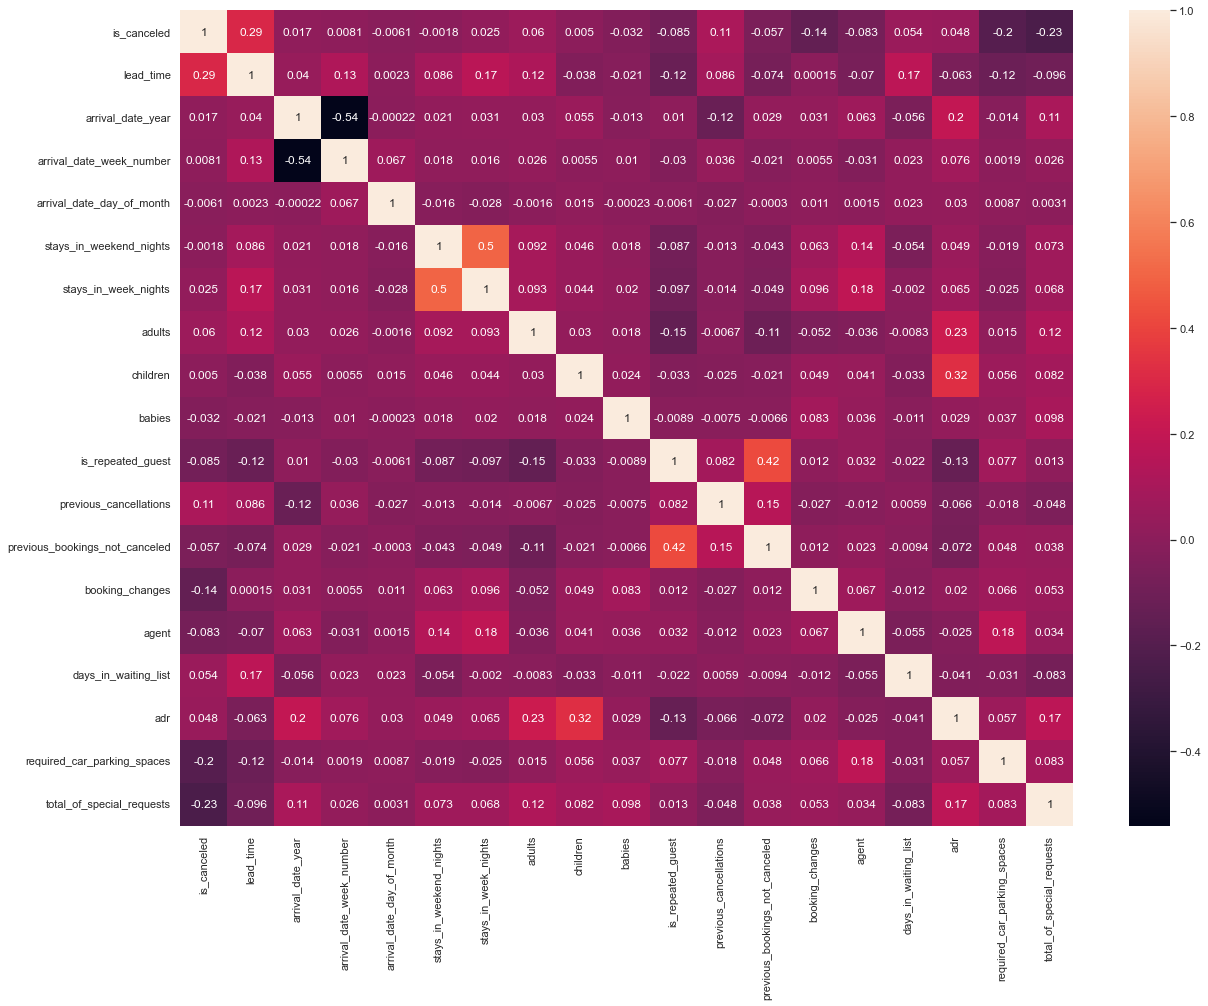

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(hotel.corr(),annot=True)

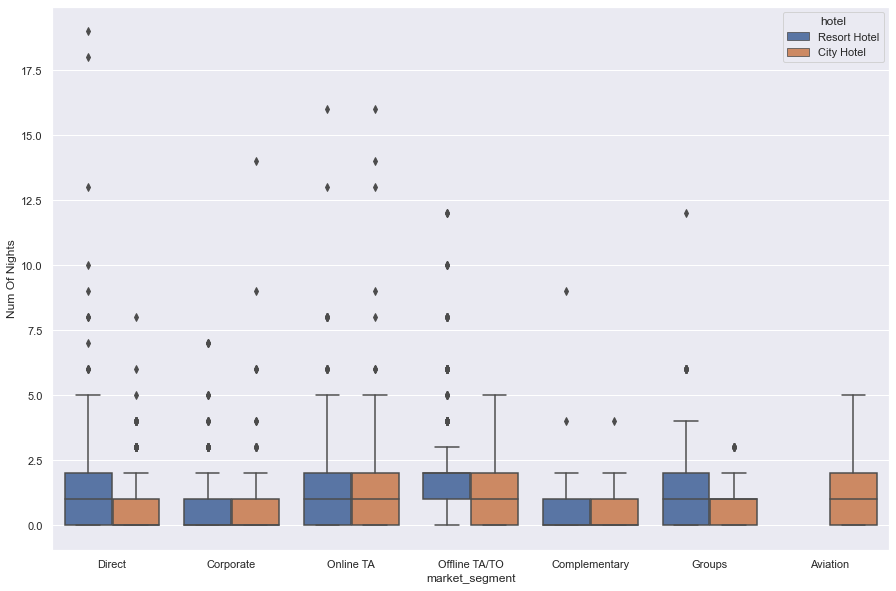

In [22]:
#Distribution of nights spent at hotels by market segment and hotel type
plt.figure(figsize=(15,10))
sns.boxplot(data=hotel[hotel['is_canceled'] == 0],x='market_segment',y='stays_in_weekend_nights',hue='hotel')
plt.ylabel('Num Of Nights')
plt.show()

From the chart above we can see that most people do not stay at the hotel more than a week.

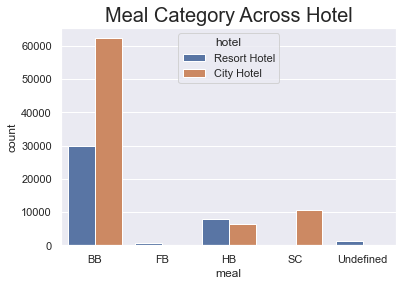

In [23]:
#Meal Category acroos the two hotel types
sns.countplot(data = hotel, x = 'meal', hue='hotel')
plt.title('Meal Category Across Hotel', fontdict={'fontsize' : 20})
plt.show()

The chart above shows that theAverage Daily Rate across FB meal category for city hotel is very less, the Average Daily Rate across SC meal category for resort hotel is very less.
The BB Meal Category is preferred across both the hotels.

#### One hot encoding

"hotel", 'arrival_date_month', 'customer_type', 'reservation_status', 'deposit_type'

In [ ]:
#one hot encoding using get dummies
categorical_features = ["hotel", 'arrival_date_month', 'customer_type', 'reservation_status', 'deposit_type']

tmp_df = pd.get_dummies(hotel.hotel,prefix="hotel")
hotel = pd.concat((hotel,tmp_df),axis=1)

tmp_df = pd.get_dummies(hotel.arrival_date_month,prefix="arrival_date_month")
hotel = pd.concat((hotel,tmp_df),axis=1)

tmp_df = pd.get_dummies(hotel.customer_type,prefix="customer_type")
hotel = pd.concat((hotel,tmp_df),axis=1)

tmp_df = pd.get_dummies(hotel.reservation_status,prefix="reservation_status")
hotel = pd.concat((hotel,tmp_df),axis=1)

tmp_df = pd.get_dummies(hotel.deposit_type,prefix="deposit_type")
hotel = pd.concat((hotel,tmp_df),axis=1)

tmp_df = pd.get_dummies(hotel.market_segment,prefix="market_segment")
hotel = pd.concat((hotel,tmp_df),axis=1)

#delete the extra columns
del hotel['hotel']
del hotel['arrival_date_month']
del hotel['customer_type']
del hotel['reservation_status']
del hotel['deposit_type']
del hotel['market_segment']
hotel.head()


In [ ]:
hotel.info()

# Data Understanding 2

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.

In [ ]:
#show arrival monnth vs total time stayed (total week nights+ total week days)

# Modeling and Evaluation 1

train and adjust parameters (GridSearch)

# Modeling and Evaluation 2

evaluate and compare

# Modeling and Evaluation 3

Visualize

# Modeling and Evaluation 4

Summarize and ramifications

# Deployment

Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?


# Exceptional Work

You have free reign to provide additional analyses or combine analyses.